In [1]:
import  os
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('sentence-transformers/distilbert-base-nli-stsb-mean-tokens')

In [2]:
os.chdir(r'C:\Users\arita\Desktop\test')
df = pd.read_csv("wikihowAll.csv", usecols = ['text'])
df = df.astype('str')
df

,text
0,"If you're a photographer, keep all the necess..."
1,See the image for how this drawing develops s...
2,It is possible to become a VFX artist without...
3,The best art investors do their research on t...
4,"As you start planning for a project or work, ..."
...,...
215360,"If you have a name that you like, you might f..."
215361,Your name might sound great to you when you s...
215362,Relief printing is the oldest and most tradit...
215363,"Intaglio is Italian for ""incis­ing,"" and corr..."


The logic is pretty simple, we just have to embed the search word and compare against the embedding of all the sentences. For comparing or checking the similarity we use a metric called Cosine Similarity.

Cosine similarity
Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.
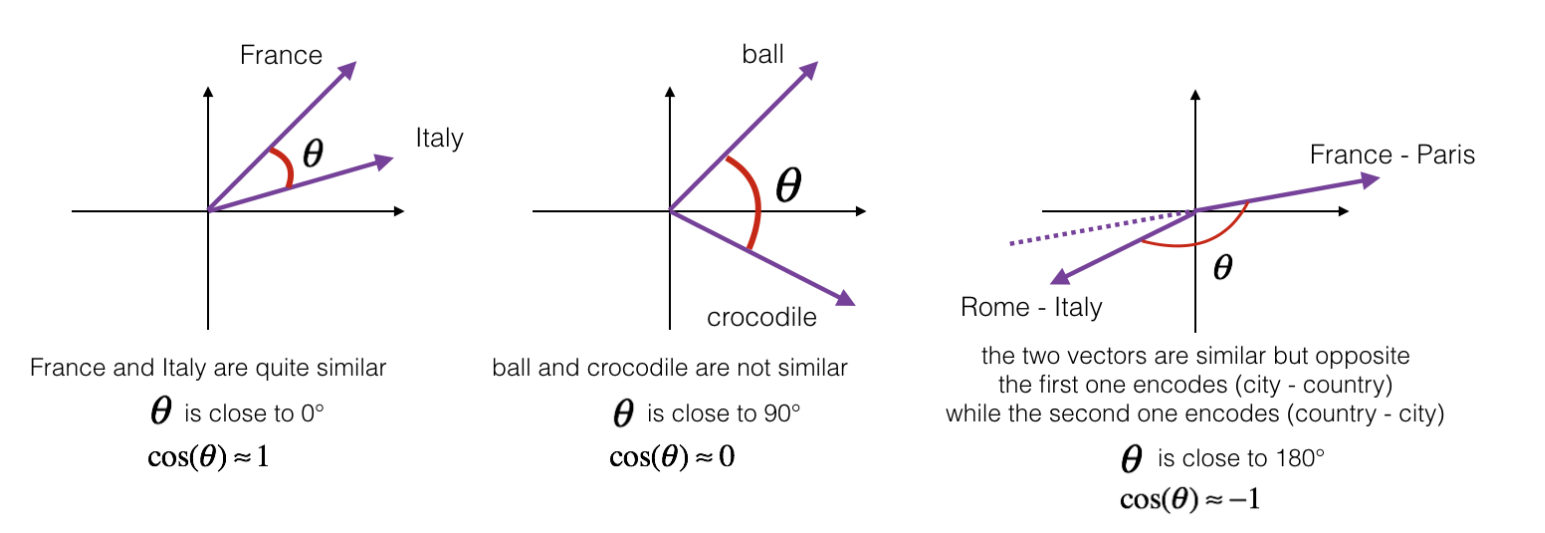

In [3]:
def find_similar(vector_representation, all_representations, k=1):
    similarity_matrix = cosine_similarity(vector_representation, all_representations)
    #np.fill_diagonal(similarity_matrix, 0)
    similarities = similarity_matrix[0]
    if k == 1:
        return [np.argmax(similarities)]
    elif k is not None:
        return np.flip(similarities.argsort()[-k:][::1])

In [4]:
paragraph = df.iloc[:, 0]
embeddings_distilbert = model.encode(paragraph.values)

In [5]:
embeddings_distilbert[0]

array([-1.49453521e-01,  4.12109733e-01,  3.12156022e-01,  2.15521455e-01,
        4.36599284e-01, -4.88729060e-01, -2.47522354e-01, -6.40267968e-01,
        3.07930529e-01, -1.07051599e+00, -2.19669566e-01,  4.19156730e-01,
       -6.75447106e-01,  2.16001987e-01,  1.73944533e-01, -6.32838011e-02,
        1.07429838e+00,  3.05007815e-01, -4.56116885e-01, -1.27294078e-01,
        1.48583472e-01, -6.25417680e-02,  1.83425266e-02,  8.03434074e-01,
       -9.71713722e-01, -4.56494428e-02,  7.71055929e-03,  2.84983814e-01,
        8.22992802e-01,  5.74710499e-03,  8.28326225e-01, -4.84701216e-01,
        7.28172883e-02, -9.51914370e-01,  5.51984668e-01,  6.68983012e-02,
        4.31595206e-01,  7.22055316e-01,  1.38940439e-01, -5.89322805e-01,
        9.97251645e-02,  3.18968296e-01, -6.55558109e-02,  5.36805511e-01,
       -3.28363925e-01,  1.82720527e-01, -1.36413336e-01, -1.62955835e-01,
       -3.14342678e-01, -2.57063299e-01, -2.32205346e-01, -5.21078944e-01,
        5.40672481e-01,  

In [6]:
embeddings_distilbert[0].shape

(768,)

In [26]:
search_string = "vegetables"
search_vect = model.encode([search_string])

In [27]:
K = 40
distilbert_similar_indexes = find_similar(search_vect, embeddings_distilbert, K)

In [28]:
distilbert_similar_indexes

array([ 85442, 129577, 127187, 127446, 176915, 130805,    111,  88460,
       199017,  89632, 199137, 199213, 133585,  89022, 134478,  71873,
        88792, 156781, 130892, 198858, 200322, 157430,  58692, 132526,
       198638, 198730, 132650, 128632, 200229, 125797,  51421, 133039,
        73239, 130351, 176338, 122966,  85496, 198861,  85603, 198671],
      dtype=int64)

In [29]:
output_data = []
for index in distilbert_similar_indexes:
    output_data.append(paragraph[index])

In [30]:
output_data[:50]

[';\n,,,, mushroom stroganoff, vegetable curries.\n\n,,,',
 ';\n, Drain the water afterwards.\n\n,, Mix it well and add it to the vegetables.\n\n,,',
 ';\n,, You can add in some dill, too.\n\n, Serve on its own or with steamed vegetables.\n\n',
 ',, Quarter the chilled potatoes and use in potato salad.\n\n,,,',
 ',,,, You could do this with a garden hose.\n\n,,,',
 ';\n,, For example: green pepper, red pepper, carrot, onion, green peas, broccoli, etc.\n\n,,,,,,,',
 " You can use peppers, tomatoes, celery, carrots, and so on. This\xa0will be best with lettuce included.\n\n,, Do not mash. Smoothly mix the vegetables together.\n\n, This one isn't very complicated, it is just a vegetable salad!\n\n",
 ';\n,, You may spray the pan with a vegetable oil spray, if you wish.\n\n,,,,,',
 ';\n,,,,,,, If done correctly, the carrot should grow new green sprouts.\n\n',
 ';\n,,,,, The vegetables should be crisp tender.\n\n,,',
 " What purpose do you want your garden to serve? Some gardens are functio